---

**ALURA DESAFIO 1 - ANALISE DE DADOS COVID - BR**

---



# **Introdução e Objetivo** 



Este projeto visa a analise exploratória dos dados do COVID-19 no Brasil, avaliando principalmente os casos de infecção por estado, validando hipóteses (qual estado tem maior número de casos, qual ...), e por fim simulando o modelo matemático epidemiológico SIR() com novas hipoteses analisando as respostas do modelo.

Por ser um tema muito atual e de grande impacto, surgiu a curiosidade sobre esta base de dados, também criar uma ferramenta, mesmo que simples para acompanhamento da evolução desta pandemia.

A base de dados analisada contém os dados compilados pela Brasil.io e divulgados pelas secretarias estaduais de saúde, neste estudo observaremos a quantidade acumulada de casos de COVID-19 por estado, a linha do tempo de crescimento destes casos, a quantidade acumulada de óbitos.

Este projeto e o primeiro desafio do Bootcamp de imersão de dados da Alura iniciado em 04/ 11/ 2020, com a base de dados fornecida pelo belíssimo projeto Brasil.io (https://brasil.io/dataset/covid19/caso/) que visa a transparência e acessibilidade aos dados, sendo um projeto totalmente filantrópico

# **Metodologia**



##**Dicionario da base de dados original**



date : Data de coleta dos dados no formato YYYY-MM-DD

state : Sigla do estado da Federação

city : Nome do município (em branco pois analisamos apenas dados do estado como um todo)

place_type : Tipo de local que esse registro descreve, pode ser city ou state

confirmed : Número de casos confirmados.

deaths : Número de mortes.

is_last : Campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False

estimated_population : População estimada para esse município/estado em 2020, segundo o IBGE.

city_ibge_code : Código IBGE do local

confirmed_per_100k_inhabitants : número de casos confirmados por 100.000 habitantes (baseado em estimated_population).

death_rate: Taxa de mortalidade (mortes / confirmados)

##**Biblioteca tecnica de Dataframes gerados durante o programa**  


df : dataframe original, completo e sem alterações.

Catuais : Apenas os casos mais atuais por estado (estado, casos confirmados).

Cpor_estado : historico de casos por estado (data, estado e casos confirmados), com os estados sendo adotados como colunas.

Mpor_estado : historico de Obitos por estado (data, estado e mortes), com os estados sendo adotados como colunas.

##**Graficos e tabelas gerados durante a analise** 





Por ordem de aparição


- Matriz de corelação da: Base de dados original.

- Gráfico de barras - Casos COVID-19 acumulados por estado (BR) até 17/ 11/ 2020.

- Gráfico de linhas - Historico de casos de COVID-19 Acumulados por estado ate 17/ 11/ 2020.

- Gráfico de corrida de barras - Historico de casos de COVID-19 por estado de 25 de fevereiro a 17 de novembro.

- Gráfico de linhas - Histórico de óbitos de COVID-19 Acumulados por estado.

- Gráfico de linhas - Casos de COVID-19 por cada 100 mil habitantes Acumulados nos estados da região Sudestes ate 17/ 11/ 2020.

- Gráfico de linhas - Comparativo do historico de infectados e obitos dos estados Alagoas, Bahia, Ceara, Maranhão e Paraiba.

- Gráfico de linhas - Casos de COVID-19 Acumulados por estado ate 17/ 11/ 2020  Analise dos ultimos 75 dias.

- Gráfico de linhas - Analise do modelo SIR com dados padrão.

- Gráfico de linhas - Analise do modelo SIR simulação de Medidas preventivas.

- Gráfico de linhas - Analise do modelo SIR simulação de Tratamento eficaz.

- Gráfico de linhas - Analise do modelo SIR simulação de Tratamento junto a medidas preventivas.



##**Analise dos dados**

### Importações

In [ ]:
# Instalando as bibliotecas utilizadas no projeto
!pip install bar_chart_race


In [ ]:
# Importando as bibliotecas utilizadas no projeto
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import bar_chart_race as bcr
from ipywidgets import interact, interact_manual


In [ ]:
# Importando a base de dador original do Github - Casos de Codvid-19 no Brasil atualizado dia 17/11/2020
url = 'https://raw.githubusercontent.com/PDamaral/Projects/main/Analise%20COVID19_BR/covid19-17_11_2020_BR.csv'

df = pd.read_csv(url,index_col=0)


### Base de dados

In [ ]:
# Print da base de dados original
df

,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,
2020-11-17,AC,NaN,state,33475,709,True,894470,12,3742.43966,0.0212
2020-11-17,AL,NaN,state,92815,2301,True,3351543,27,2769.32147,0.0248
2020-11-17,AM,NaN,state,170458,4723,True,4207714,13,4051.08332,0.0277
2020-11-17,AP,NaN,state,55382,782,True,861773,16,6426.51835,0.0141
2020-11-17,BA,NaN,state,375374,7989,True,14930634,29,2514.11963,0.0213
...,...,...,...,...,...,...,...,...,...,...
2020-02-29,SP,NaN,state,2,0,False,46289333,35,0.00432,0.0000
2020-02-28,SP,NaN,state,2,0,False,46289333,35,0.00432,0.0000
2020-02-27,SP,NaN,state,1,0,False,46289333,35,0.00216,0.0000


In [ ]:
# Explorar quais features o dataset possui
df.columns

Index(['state', 'city', 'place_type', 'confirmed', 'deaths', 'is_last',
       'estimated_population', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate'],
      dtype='object')

In [ ]:
# Descritivo das features, neste caso observamos que os valores de city são nulos, temos dados faltantes em confirmed_per_100k_inhabitants
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6649 entries, 2020-11-17 to 2020-02-25
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   state                           6649 non-null   object 
 1   city                            0 non-null      float64
 2   place_type                      6649 non-null   object 
 3   confirmed                       6649 non-null   int64  
 4   deaths                          6649 non-null   int64  
 5   is_last                         6649 non-null   bool   
 6   estimated_population            6649 non-null   int64  
 7   city_ibge_code                  6649 non-null   int64  
 8   confirmed_per_100k_inhabitants  6643 non-null   float64
 9   death_rate                      6649 non-null   float64
dtypes: bool(1), float64(3), int64(4), object(2)
memory usage: 525.9+ KB


In [ ]:
# Descritivo dos valores das features(colunas) da base de dados
df.describe()

,city,confirmed,deaths,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
count,0.0,6.649000e+03,6649.000000,6.649000e+03,6649.000000,6643.000000,6649.000000
mean,NaN,8.818899e+04,2846.383817,8.000792e+06,29.288314,1544.493720,0.031437
std,NaN,1.370886e+05,5174.789019,9.319915e+06,12.767371,1667.514721,0.021924
min,NaN,0.000000e+00,0.000000,6.311810e+05,11.000000,0.002160,0.000000
25%,NaN,4.160000e+03,138.000000,2.809394e+06,17.000000,82.281375,0.020400
50%,NaN,4.712400e+04,1088.000000,4.064052e+06,27.000000,1142.824850,0.025500
75%,NaN,1.218790e+05,3352.000000,9.616621e+06,41.000000,2504.156140,0.036500
max,NaN,1.178075e+06,40749.000000,4.628933e+07,53.000000,9631.151760,0.222200


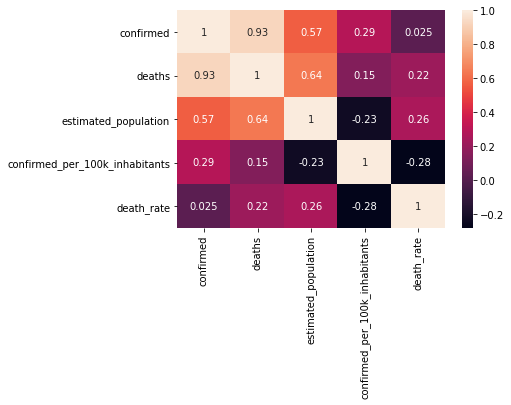

In [ ]:
# Criando a matriz de coorelações das features mais importantes do dataset
df_corelacoes = pd.DataFrame(df,columns=['confirmed','deaths','estimated_population','confirmed_per_100k_inhabitants','death_rate'])

corrMatrix = df_corelacoes.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

###**Analisando base de dados original - resultados preliminares**




Observando os descritivos das features não temos muita clareza e devemos organizar melhor os dados para uma analise mais precisa.

Porem analisando a matriz de corelações podemos observar o seguinte:

- A quantidade de confirmados e a quantidade de obitos e altamente corelacionada, como esperado. 

- A Quantidade de população estimada e inversamente proporcional aos casos confirmados por 100k Habitantes, ponto a ser investigado.

- Existe maior relação entre os casos de obitos por população estimada do que casos de infecção, implicando que teremos taxas mais proximas de obito do que taxas de infecção entre os estados, ponto a ser investigado.


## **Analise dos casos acumulados confirmados, apenas ultimos valores validos**


Criação de graficos para visualização da situação mais atual do contagio de COVID-19 no Brasil

In [ ]:
# Criando uma base de dados nova retirando as colunas = city, place_type, deaths, estimated_population, city_ibge_code,confirmed_per_100k_inhabitants, death_rate
Catuais = df.drop(['city','place_type', 'deaths', 'estimated_population','city_ibge_code','confirmed_per_100k_inhabitants','death_rate'], axis =1)

In [ ]:
# Organizando os valores de forma descendente da feature is_last e mantendo apenas os primeiros 27 registros (1 para cada estado)
Catuais = Catuais.sort_values('is_last', ascending= False).head(27)

In [ ]:
# Retirando a coluna is_last
Catuais = Catuais.drop(['is_last'], axis =1)

In [ ]:
# Organizando os valores de forma descendente da feature confirmed
Catuais = Catuais.sort_values('confirmed', ascending= False)

In [ ]:
# Apresentação da tebela dos casos acumulados de cada estado
Catuais

,state,confirmed
date,,
2020-11-17,SP,1178075
2020-11-17,MG,385427
2020-11-17,BA,375374
2020-11-17,RJ,330009
2020-11-17,SC,302578
2020-11-17,CE,287629
2020-11-17,RS,283351
2020-11-17,GO,269805
2020-11-17,PA,263155


In [ ]:
# Adquirir o valor total dos casos confirmados
Tconfirmados = Catuais.loc[:,'confirmed'].sum(axis=0)
print(f'{Tconfirmados} total de casos acumulados confirmados no Brasil')

5915139 total de casos acumulados confirmados no Brasil


In [ ]:
# Criando grafico de barras dos casos acumulados de cada estado
fig = go.Figure(data=[
    go.Bar(name='Cases', x=Catuais['state'], y=Catuais['confirmed'])])

fig.update_xaxes(title_text= 'Estados do Brasil - com numero acumulados de casos igual a: 'f'{Tconfirmados} casos')
fig.update_yaxes(title_text="Numero de casos acumulados(em Milhão)")

fig.update_layout(title='Casos COVID-19 acumulados por estado(BR) ate 17/11/2020')
fig.update_layout(template='seaborn',width=1500,xaxis=dict(mirror=True,linewidth=2,linecolor='black',showgrid=True),
                 yaxis=dict(mirror=True,linewidth=2,linecolor='black'))

fig.show()

###**Analisando casos acumulados por estado - resultados preliminares**

Ao analisar o grafico de casos acumulados podemos notar:

- Estados mais populosos tendem a ter mais casos, ponto a se investigar.

- Minas Gerais e Bahia possuem numeros proximos de contaminados, porem diferença em sua quantidade populacional, ponto a se investigar.

- São Paulo esta com muito mais casos que qualquer outra região do pais, porem e o estado mais populoso, logo contagio pela população deve estar similar em todos os estados, ponto a se investigar.

## **Historico de crescimento de contaminações por estado**

Manipulação da base de dados para criação de nova base de dados com casos registrados por dia, por estado e demostrar graficamento o crescimento do contagio.

In [ ]:
# Removendo features que não serão utilizadas para este conjunto de dados
casos_estado = df.drop(['city','place_type', 'is_last','deaths', 'estimated_population','city_ibge_code','confirmed_per_100k_inhabitants','death_rate' ], axis =1)

In [ ]:
# Amostragem apenas com casos cumulativos confirmados por estado por data
casos_estado

,state,confirmed
date,,
2020-11-17,AC,33475
2020-11-17,AL,92815
2020-11-17,AM,170458
2020-11-17,AP,55382
2020-11-17,BA,375374
...,...,...
2020-02-29,SP,2
2020-02-28,SP,2
2020-02-27,SP,1


In [ ]:
#Setando os valores das colunas dos estados como colunas
Cpor_estado = casos_estado.pivot_table(values="confirmed", index="date", columns="state")
Cpor_estado

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-13,32661.0,92328.0,168596.0,54417.0,371378.0,283463.0,219012.0,168358.0,267319.0,189321.0,379274.0,87602.0,151893.0,261534.0,137942.0,169710.0,119940.0,NaN,323006.0,83762.0,74598.0,60416.0,274411.0,289787.0,85893.0,1162782.0,77972.0
2020-11-14,32991.0,92480.0,169165.0,54838.0,372727.0,284208.0,219712.0,168839.0,267540.0,189501.0,381310.0,87935.0,152129.0,261788.0,138464.0,170553.0,120172.0,238314.0,326645.0,NaN,74981.0,60535.0,277519.0,293802.0,85980.0,1167422.0,78077.0
2020-11-15,33156.0,92596.0,169333.0,54979.0,374009.0,285666.0,219992.0,169928.0,267772.0,189590.0,382882.0,88111.0,152358.0,261899.0,138546.0,170860.0,120266.0,239107.0,326956.0,84021.0,75182.0,60579.0,278707.0,295946.0,86045.0,1168640.0,78169.0


In [ ]:
# Preenchendo os valores não informados como ''não alterações'', utilizando ultimo valor valido informado
Cpor_estado = Cpor_estado.fillna(method= 'ffill')

In [ ]:
# Preenchendo valores iniciais como 0
Cpor_estado = Cpor_estado.fillna(0)

In [ ]:
# Print da base de dados manipulada com cada feature sendo um estado e cada linha sendo uma data, cada celula sendo a quantidade acumulada de caso para aquele estado naquela data
Cpor_estado

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-02-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-02-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2020-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-13,32661.0,92328.0,168596.0,54417.0,371378.0,283463.0,219012.0,168358.0,267319.0,189321.0,379274.0,87602.0,151893.0,261534.0,137942.0,169710.0,119940.0,227823.0,323006.0,83762.0,74598.0,60416.0,274411.0,289787.0,85893.0,1162782.0,77972.0
2020-11-14,32991.0,92480.0,169165.0,54838.0,372727.0,284208.0,219712.0,168839.0,267540.0,189501.0,381310.0,87935.0,152129.0,261788.0,138464.0,170553.0,120172.0,238314.0,326645.0,83762.0,74981.0,60535.0,277519.0,293802.0,85980.0,1167422.0,78077.0
2020-11-15,33156.0,92596.0,169333.0,54979.0,374009.0,285666.0,219992.0,169928.0,267772.0,189590.0,382882.0,88111.0,152358.0,261899.0,138546.0,170860.0,120266.0,239107.0,326956.0,84021.0,75182.0,60579.0,278707.0,295946.0,86045.0,1168640.0,78169.0


In [ ]:
# Explorar as features, 1 para cada estado
Cpor_estado.columns

Index(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],
      dtype='object', name='state')

In [ ]:
# Verificação dos valores das features, sendo nenhum valor nulo, confirmando que as transformações foram bem sucedidas em primeiro momento
Cpor_estado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 2020-02-25 to 2020-11-17
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      267 non-null    float64
 1   AL      267 non-null    float64
 2   AM      267 non-null    float64
 3   AP      267 non-null    float64
 4   BA      267 non-null    float64
 5   CE      267 non-null    float64
 6   DF      267 non-null    float64
 7   ES      267 non-null    float64
 8   GO      267 non-null    float64
 9   MA      267 non-null    float64
 10  MG      267 non-null    float64
 11  MS      267 non-null    float64
 12  MT      267 non-null    float64
 13  PA      267 non-null    float64
 14  PB      267 non-null    float64
 15  PE      267 non-null    float64
 16  PI      267 non-null    float64
 17  PR      267 non-null    float64
 18  RJ      267 non-null    float64
 19  RN      267 non-null    float64
 20  RO      267 non-null    float64
 21  RR      267 non-null    floa

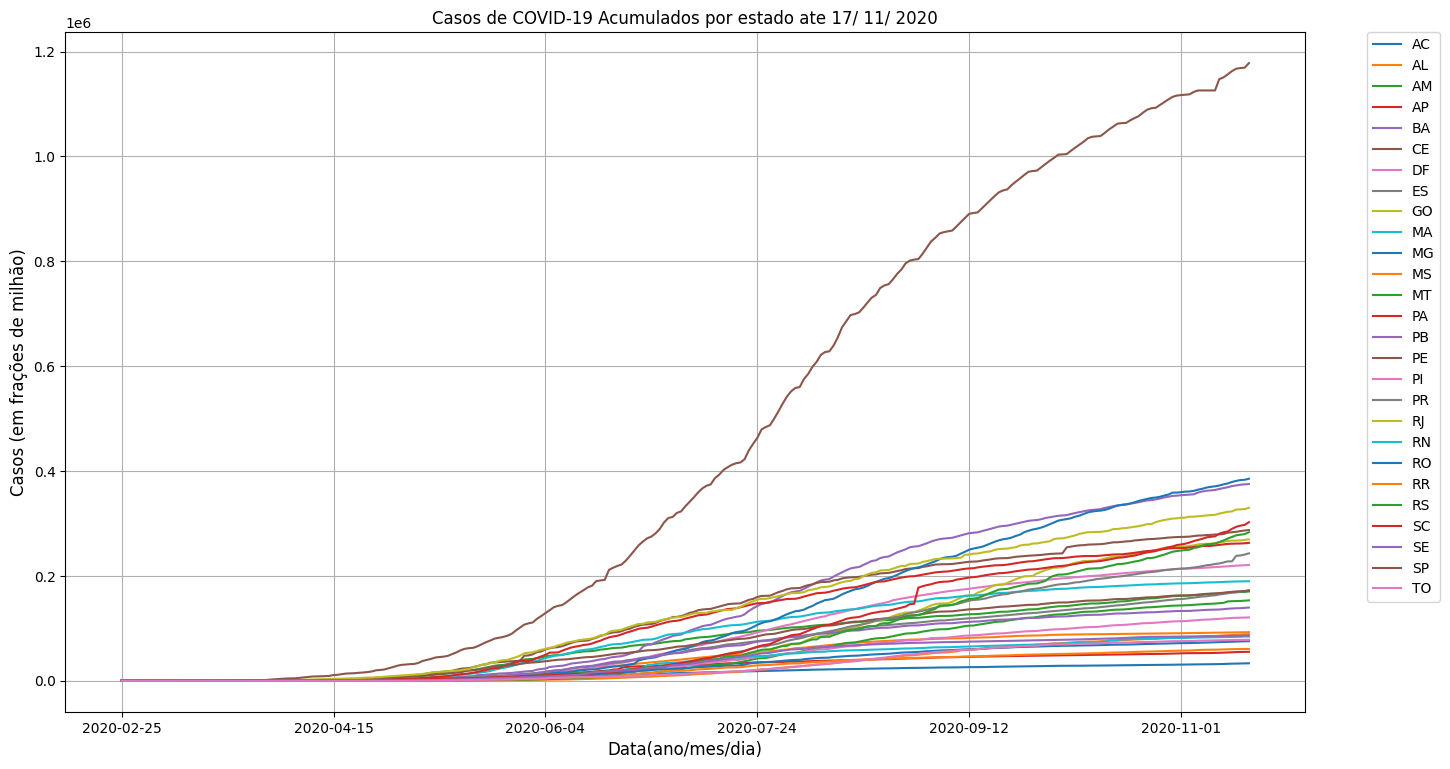

In [ ]:
# Plotagem de grafico em linhas de casos do COVID-19 acumulados por estado
%matplotlib inline

plt.figure(figsize=(16,9), dpi=100)

plt.xticks(ticks=np.arange(0,260, 50), fontsize=10)


plt.title('Historico de casos de COVID-19 Acumulados por estado ate 17/ 11/ 2020')  
plt.xlabel('Data(ano/mes/dia)',fontsize=12)
plt.ylabel('Casos (em frações de milhão)', fontsize=12)
plt.grid()

plt.plot(Cpor_estado)
plt.legend(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

Utilizando o grafico de linhas com tantas variaveis podemos tirar algumas conclusões:

- São Paulo teve maior numero de infectados durante todo o periodo.

- Demais estados parecem ter pouca diferença quanto ao numero de infectados.

- Ocorreu uma forte alta de casos em SP por volta do dia 6 de novembro, a se investigar.

Entendemos que este grafico não se mostra o mais efetivo para uma analise clara dos dados como por exemplo nos estagios iniciais de contagio, a interpretação fica impossibilitada, para melhor analise foi dimensionado um grafico de corrida de barras a seguir.

### Historico de crescimento dos casos acumulados de COVID

In [ ]:
# Plotagem do grafico de corrida de barras dos casos acumulados por estado 
# AVISO - ESTA LINHA GERA UM GRAFICO DE CORRIDA DE BARRAS QUE LEVA DE 10 A 15 MINUTOS PARA PROCESSAR(NO COLAB). CASO ESTE TEMPO SEJA DEMASIADO, POR FAVOR COMENTAR A LINHA E SEGUIR EM FRENTE.

bcr.bar_chart_race(df = Cpor_estado, title = "Historico de casos de COVID-19 por estado de 25 de Fevereiro a 17 de Novembro ",n_bars=27, orientation='h', fixed_order= False, cmap = 'sunsetdark',
                    period_summary_func=lambda v, r: {'x': .98, 'y': .2, 
                                          's': f'Total de contaminações: {v.sum():,.0f}', 
                                          'ha': 'right', 'size': 11})


###**Analisando historico de casos acumulados por estado - resultados preliminares**

Com o grafico de corrida de barras, podemos obervar de maneira mais clara:

- O avanço quase que uniforme no inicio do contagio entre os estados em duas ''pequenas ondas'' iniciadas nos dias 04 /03 e a segunda 15 dias apos esse periodo.

- Fica mais claro que existe um distanciamento do quantitativo de contagio entre os estados.

## **Analise do Historico de obitos acumulados por estado**

In [ ]:
# Analise de morte por estado 
# Utilizada a mesma tecnica de manipulação de tabela usada na analise do historico de contaminações por estado
morte_estado = df.drop(['city','place_type', 'is_last','confirmed', 'estimated_population','city_ibge_code','confirmed_per_100k_inhabitants','death_rate' ], axis =1) #Retirar colunas não uteis
Mpor_estado = morte_estado.pivot_table(values="deaths", index="date", columns="state") #Utilizar estados como features
Mpor_estado = Mpor_estado.fillna(method= 'ffill') # Preenchimento de valores nulos com ultimo valor valido
Mpor_estado = Mpor_estado.fillna(0) # Preenchimento de valores nulos por 0
Mpor_estado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 2020-02-25 to 2020-11-17
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      267 non-null    float64
 1   AL      267 non-null    float64
 2   AM      267 non-null    float64
 3   AP      267 non-null    float64
 4   BA      267 non-null    float64
 5   CE      267 non-null    float64
 6   DF      267 non-null    float64
 7   ES      267 non-null    float64
 8   GO      267 non-null    float64
 9   MA      267 non-null    float64
 10  MG      267 non-null    float64
 11  MS      267 non-null    float64
 12  MT      267 non-null    float64
 13  PA      267 non-null    float64
 14  PB      267 non-null    float64
 15  PE      267 non-null    float64
 16  PI      267 non-null    float64
 17  PR      267 non-null    float64
 18  RJ      267 non-null    float64
 19  RN      267 non-null    float64
 20  RO      267 non-null    float64
 21  RR      267 non-null    floa

In [ ]:
Mpor_estado 

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-13,707.0,2288.0,4683.0,774.0,7902.0,9435.0,3808.0,3993.0,6029.0,4162.0,9405.0,1688.0,4036.0,6817.0,3193.0,8805.0,2523.0,5610.0,21162.0,2649.0,1497.0,706.0,6168.0,3298.0,2254.0,40202.0,1133.0
2020-11-14,708.0,2291.0,4693.0,777.0,7922.0,9439.0,3813.0,3998.0,6030.0,4171.0,9504.0,1690.0,4040.0,6827.0,3199.0,8815.0,2524.0,5691.0,21284.0,2649.0,1501.0,706.0,6215.0,3309.0,2257.0,40549.0,1137.0
2020-11-15,708.0,2295.0,4697.0,777.0,7943.0,9439.0,3817.0,4009.0,6035.0,4178.0,9507.0,1693.0,4041.0,6832.0,3204.0,8827.0,2530.0,5697.0,21294.0,2652.0,1501.0,706.0,6219.0,3318.0,2259.0,40564.0,1137.0


In [ ]:
# Plotagem de grafico em linhas de obitos do COVID-19 acumulados por estado
plt.figure(figsize=(18,9), dpi=100)
plt.xticks(ticks=np.arange(0,260, 50), fontsize=10)

plt.title('Historico de obitos de COVID-19 Acumulados por estado')  
plt.xlabel('Data(ano/mes/dia)',fontsize=12)
plt.ylabel('Obitos ', fontsize=12)
plt.grid()

plt.plot(Mpor_estado)

plt.legend(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

In [ ]:
# Analise de conta por estado 
# Utilizada a mesma tecnica de manipulação de tabela usada na analise do historico de contaminações por estado
morte_estado = df.drop(['city','place_type', 'is_last','confirmed', 'estimated_population','city_ibge_code','confirmed_per_100k_inhabitants','death_rate' ], axis =1) #Retirar colunas não uteis
Mpor_estado = morte_estado.pivot_table(values="deaths", index="date", columns="state") #Utilizar estados como features
Mpor_estado = Mpor_estado.fillna(method= 'ffill') # Preenchimento de valores nulos com ultimo valor valido
Mpor_estado = Mpor_estado.fillna(0) # Preenchimento de valores nulos por 0
Mpor_estado.info()

###**Analisando historico de obitos acumulados por estado - resultados preliminares**

O grafico aparenta acompanhar o mesmo estilo do grafico de infecções, porem:

- Em comparação com o grafico de casos acumulados, temos uma grande discrepancia nos valores para o estado do RJ, porem demais estados parecem acompanhar a tendencia de infecções. Ponto a se investigar.

- Entre o mes de abril e junho temos um grande crescimento de obitos em todos os estados, porem somente SP e RJ seguiram a tendencia de crescimento. Ponto a se investigar.

#**Hipoteses da analise**

##**Os estados mais populosos tambem tiveram as maiores taxas de infecção durante o periodo analisado.**

Resultado: Por mais que tenha uma coorelação esta hipotese não e valida, em analise observamos que o estado do Espirito Santo tem muito mais casos por 100 mil habitantes do que São Paulo, por outro lado São Paulo tem mais casos do que Rio de Janeiro e Minas Gerais mostrando que população e um fator a ser considerado porem não e um fator determinante por si so.

In [45]:
# Analise da quantidade de infectados a cada 100 mil habitantes por estado
# Utilizada a mesma tecnica de manipulação de tabela usada na analise do historico de contaminações por estado
aux1 = df.drop(['city','place_type', 'is_last','confirmed', 'estimated_population','city_ibge_code','deaths','death_rate' ], axis =1) #Retirar colunas não uteis
Cpor_estado_100k = aux1.pivot_table(values="confirmed_per_100k_inhabitants", index="date", columns="state") #Utilizar estados como features 
Cpor_estado_100k = Cpor_estado_100k.fillna(method= 'ffill') # Preenchimento de valores nulos com ultimo valor valido
Cpor_estado_100k = Cpor_estado_100k.fillna(0) # Preenchimento de valores nulos por 0
Cpor_estado_100k.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 2020-02-25 to 2020-11-17
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      267 non-null    float64
 1   AL      267 non-null    float64
 2   AM      267 non-null    float64
 3   AP      267 non-null    float64
 4   BA      267 non-null    float64
 5   CE      267 non-null    float64
 6   DF      267 non-null    float64
 7   ES      267 non-null    float64
 8   GO      267 non-null    float64
 9   MA      267 non-null    float64
 10  MG      267 non-null    float64
 11  MS      267 non-null    float64
 12  MT      267 non-null    float64
 13  PA      267 non-null    float64
 14  PB      267 non-null    float64
 15  PE      267 non-null    float64
 16  PI      267 non-null    float64
 17  PR      267 non-null    float64
 18  RJ      267 non-null    float64
 19  RN      267 non-null    float64
 20  RO      267 non-null    float64
 21  RR      267 non-null    floa

In [46]:
Cpor_estado_100k

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-25,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00216,0.00000
2020-02-26,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00216,0.00000
2020-02-27,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00216,0.00000
2020-02-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00432,0.00000
2020-02-29,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00432,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-13,3651.43605,2754.79085,4006.83126,6314.53991,2487.35586,3085.44489,7168.61927,4142.61432,3757.88988,2661.02175,1781.24242,3118.18136,4307.53044,3009.33925,3415.01709,1764.75708,3655.05808,1978.17283,1859.97054,2370.06478,4152.49992,9571.89776,2402.27303,3995.68314,3704.16530,2511.98694,4903.13461
2020-11-14,3688.32940,2759.32608,4020.35404,6363.39268,2496.39098,3093.55408,7191.53141,4154.44980,3760.99663,2663.55176,1790.80440,3130.03445,4314.22316,3012.26189,3427.94020,1773.52315,3662.12806,2069.26553,1880.92506,2370.06478,4173.81962,9590.75131,2429.48136,4051.04335,3707.91721,2522.01085,4909.73735
2020-11-15,3706.77608,2762.78717,4024.34671,6379.75430,2504.97735,3109.42416,7200.69627,4181.24571,3764.25802,2664.80271,1798.18723,3136.29914,4320.71737,3013.53912,3429.97026,1776.71554,3664.99263,2076.15110,1882.71589,2377.39325,4185.00829,9597.72236,2439.88146,4080.60556,3710.72036,2524.64212,4915.52261


In [49]:
# Criando base de dados apenas para os casos dos estados do sudeste
Casos_sudeste_100k = Cpor_estado_100k[['SP','RJ','MG', 'ES' ]]
Casos_sudeste_100k

state,SP,RJ,MG,ES
date,,,,
2020-02-25,0.00216,0.00000,0.00000,0.00000
2020-02-26,0.00216,0.00000,0.00000,0.00000
2020-02-27,0.00216,0.00000,0.00000,0.00000
2020-02-28,0.00432,0.00000,0.00000,0.00000
2020-02-29,0.00432,0.00000,0.00000,0.00000
...,...,...,...,...
2020-11-13,2511.98694,1859.97054,1781.24242,4142.61432
2020-11-14,2522.01085,1880.92506,1790.80440,4154.44980
2020-11-15,2524.64212,1882.71589,1798.18723,4181.24571


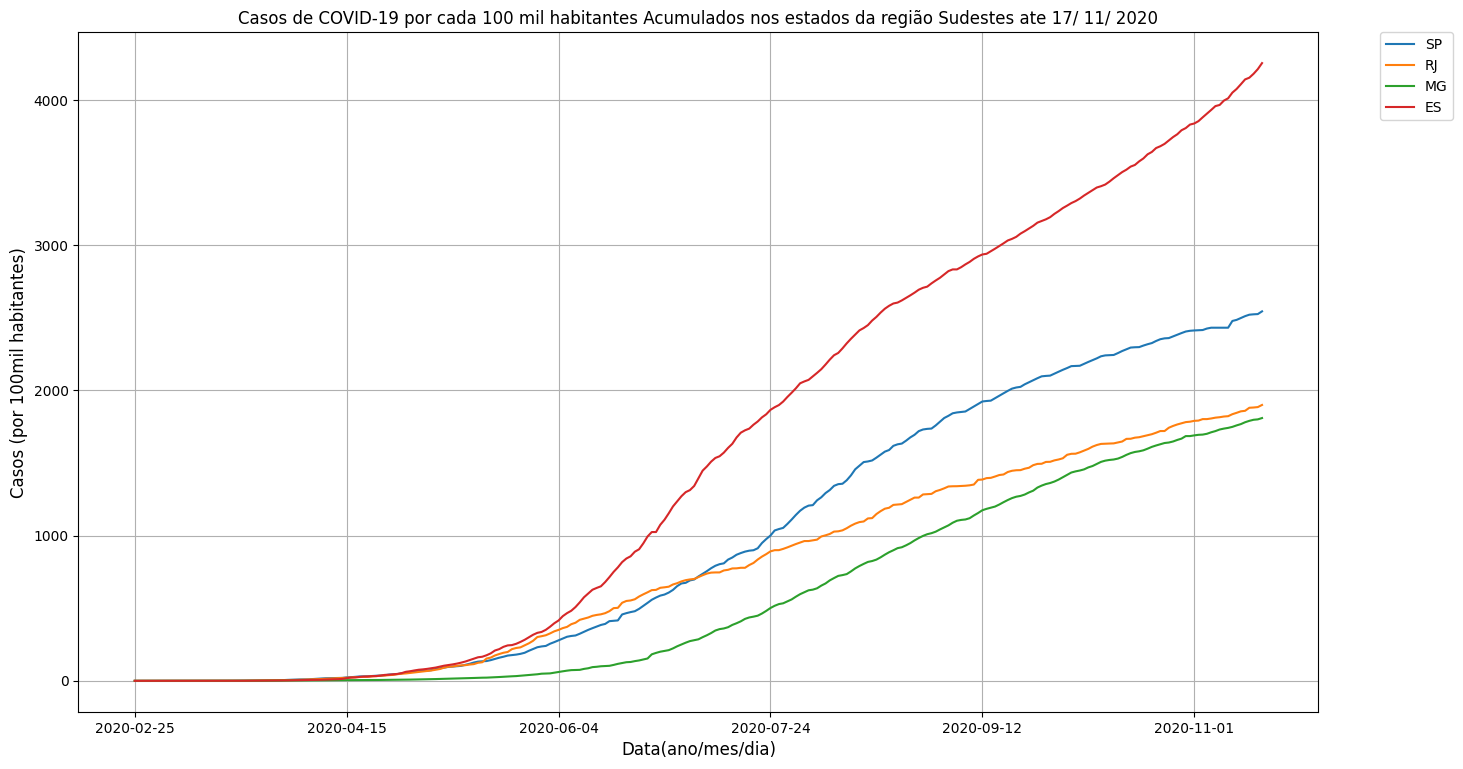

In [48]:
# Criação do grafico comparativo
%matplotlib inline

plt.figure(figsize=(16,9), dpi=100)

plt.xticks(ticks=np.arange(0,260, 50), fontsize=10)


plt.title('Casos de COVID-19 por cada 100 mil habitantes Acumulados nos estados da região Sudestes ate 17/ 11/ 2020')  
plt.xlabel('Data(ano/mes/dia)',fontsize=12)
plt.ylabel('Casos (por 100mil habitantes)', fontsize=12)
plt.grid()

plt.plot(Casos_sudeste_100k)
plt.legend(['SP','RJ','MG', 'ES'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

##**A relação de obitos e infectados e proporcional.**

Resultado: Podemos observar a tendencia dos graficos como esta hipotese não sendo verdadeira, pois mesmo que existe uma relação entre as features, não e o unico fator como por exemplo negligenciar o tratamento da doença, causa aumento de obitos.

Analisado os graficos de infecções acumuladas e obitos acumulados para os estados de Alagoas, Bahia, Ceara, Maranhão e Paraiba, podemos observar que o Ceara teve uma alta significativa de obitos ficando com a curva muito acima dos outros estados, incluindo a Bahia onde houveram mais infecções.

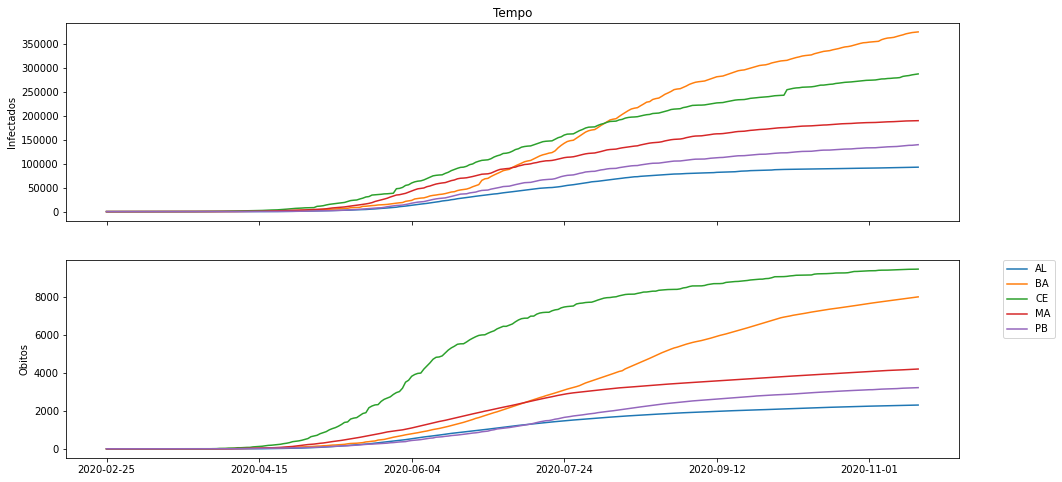

In [134]:
# Criação de graficos de infectados e obitos para os estados Alagoas, Bahia, Ceara, Maranhão e Paraiba
# dividindo o eixo X (eixo do tempo) para comparação de tendencias 

f, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(16,8))

im1 = ax1.plot(Cpor_estado[['AL', 'BA', 'CE', 'MA', 'PB']])
im2 = ax2.plot(Mpor_estado[['AL', 'BA', 'CE', 'MA', 'PB']])

plt.title('Comparativo do historico de Infectados e obitos dos estados Alagoas, Bahia, Ceara, Maranhão e Paraiba ') 
plt.xticks(ticks=np.arange(0,260, 50), fontsize=10)

ax1.set_ylabel('Infectados')
ax2.set_ylabel('Obitos')
ax1.set_title('Tempo')
plt.legend(['AL', 'BA', 'CE', 'MA', 'PB'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

##**Estamos entrando na 'segunda onda' (novo aumento de casos)**

Resultado: Com a analise dos ultimos 75 dias, não atingimos o plato, portanto podemos dizer que ainda estamos na 'primeira onda', e não houveram acrescimos muito acentuados de caso neste periodo.

Devido a natureza de sintomas do COVID-19 ha um atraso de 10 a 15 dias da manifestação da infecção, então os dados podem tambem ser interpretados com este atraso.



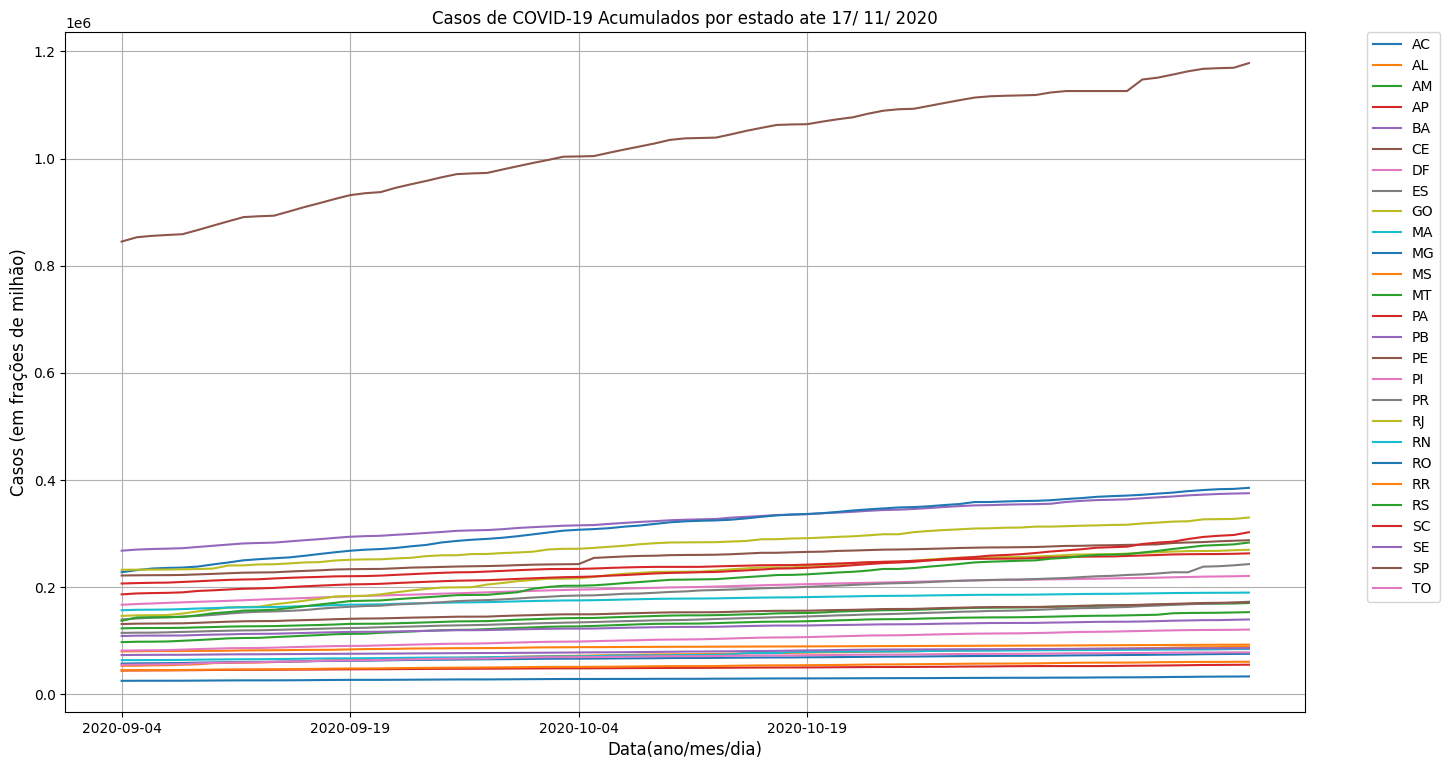

In [150]:
%matplotlib inline

plt.figure(figsize=(16,9), dpi=100)

plt.xticks(ticks=np.arange(0,50, 15), fontsize=10)

plt.title('Casos de COVID-19 Acumulados por estado ate 17/ 11/ 2020 - Analise dos ultimos 75 dias')  
plt.xlabel('Data(ano/mes/dia)',fontsize=12)
plt.ylabel('Casos (em frações de milhão)', fontsize=12)
plt.grid()

plt.plot(Cpor_estado.tail(75))
plt.legend(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

# **Aplicação da analise SIR (Suscetíveis | Infectados | Recuperados/Removidos)**

Nesta seção iremos apresentar uma analise amadora utilizando um modelo matematico para analises epidemiologicas, conhecido como modelo SIR (Suscetíveis | Infectados | Recuperados/Removidos), onde criaremos uma ferramenta para suposições demostrando em um grafico a curva da porcentagem da população Sucetivel, Infectada e Removida(Recuperada ou Falecida) da população de acordo com taxa de contagio e taxa de recuperação.

Para informações mais detalhadas do modelo: https://en.wikipedia.org/wiki/Kermack%E2%80%93McKendrick_theory 

Modelo adotado e adaptado do trabalho do excelente professor Hallison Paz: https://www.youtube.com/watch?v=xx0FVN8MAu0


**Legenda das variaveis:**

S: Grupo de Sucetiveis ao contagio

I: Grupo de contaminados

R: Grupo de removidos (recuperados ou falecidos)

I0: Porcentagem da população infectada

Beta: Taxa de contagio (o quão rapido e o contagio entre o grupo suceteveis)

Gamma: Taxa de recuperação (o quão rapida e a racuperação dos infectados)


Para os parametros iniciais de Beta e Gamma foram utilizados dados da analise estatistica do COVID-19 do blog Learning Machines: https://blog.ephorie.de/epidemiology-how-contagious-is-novel-coronavirus-2019-ncov

In [ ]:
# Importação de biblioteca especifica
import os
OUTPUT_DIR = os.path.join('images', 'SIR')

In [ ]:
# Criação da função 
def SIR(I0=0.0001,
        dt = 1,
        days = 20,
        beta=2.5, 
        gamma=0.8,
        corrector=False):

    n_samples = int(days/dt) + 1
    t = np.linspace(0, days, n_samples)

    S = np.zeros(n_samples)
    I = np.zeros(n_samples)
    R = np.zeros(n_samples)
    # Initial condition
    R[0] = 0
    I[0] = I0
    S[0] = 1 - I0

    # Step equations forward in time
    for n in range(len(t)-1):
        # predictor
        S[n+1] = S[n] - dt*beta*S[n]*I[n]
        I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n] 
        R[n+1] = R[n] + dt*gamma*I[n]
        if corrector:
            S[n+1] = S[n] - dt*beta*S[n+1]*I[n+1]
            I[n+1] = I[n] + dt*beta*S[n+1]*I[n+1] - dt*gamma*I[n+1] 
            R[n+1] = R[n] + dt*gamma*I[n+1]
    # R0 = beta*S[0]/gamma
    # print('R0', R0)
    return S, I, R

In [ ]:
# Determinação dos padrões iniciais
I0 = 0.01
# Parameters
dt = 1
days = 20
beta = 0.6746089
gamma = 0.3253912
# simulations = {}
S, I, R = SIR(I0, dt, days, beta, gamma)

In [ ]:
# Criação da interface da ferramenta
@interact_manual(I0=(0.0, 1.0, 0.01), 
                 dt=(0.1, 2))
def draw_SIR_curves(I0 = 0.01,
                    #dt = 0.1,
                    days = 20,
                    beta = 0.6746089, 
                    gamma = 0.3253912,
                    corrector = False):
    S, I, R = SIR(I0, dt, days, beta, gamma, corrector)
    t = [dt*i for i in range(len(S))]
    fig = plt.figure(figsize=(12,8))
    l1, l2, l3 = plt.plot(t, S, t, I, t, R)
    fig.legend((l1, l2, l3), ('Sucetiveis', 'Infectados', 'Removidos'), 'center right')
    plt.xlabel('Tempo em dias')
    plt.ylabel('% populacional')
    plt.show()

#ATENÇÃO - APOS COMPILAÇÃO CLINCAR EM RUN INTERACT PARA A CRIAÇÃO DO MODELO
# I0: Porcentagem da população infectada
# Beta: Taxa de contagio (o quão rapido e o contagio entre o grupo suceteveis)
# Gamma: Taxa de recuperação (o quão rapida e a racuperação dos infectados)

###**Analise do modelo SIR com dados padrão**

Segundo a AMIB (https://www.amib.org.br/fileadmin/user_upload/amib/2020/abril/28/dados_uti_amib.pdf) o Brasil possui 45.848 leitos de UTI com uma população estimada de 211 milhões, a capacidade de absorção seria de 0,02% da população total em camas de UTI.

Com os valores padrão podemos observar que o pico da pandemia ocorreria de 12 a 15 dias apos o primeiro contagio, levando proximo a 20% da população a ficar infectada, conforme estudo realizado pelo grupo UOL (https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2020/03/17/somente-1-em-cada-10-casos-do-novo-coronavirus-estao-hospitalizados.htm) 10% dos infectados são internados em UTI, o que leva a 2% da população em nosso estudo, um numero alarmante visto que majoritariamente faltariam leitos e atendimento aos infectados.



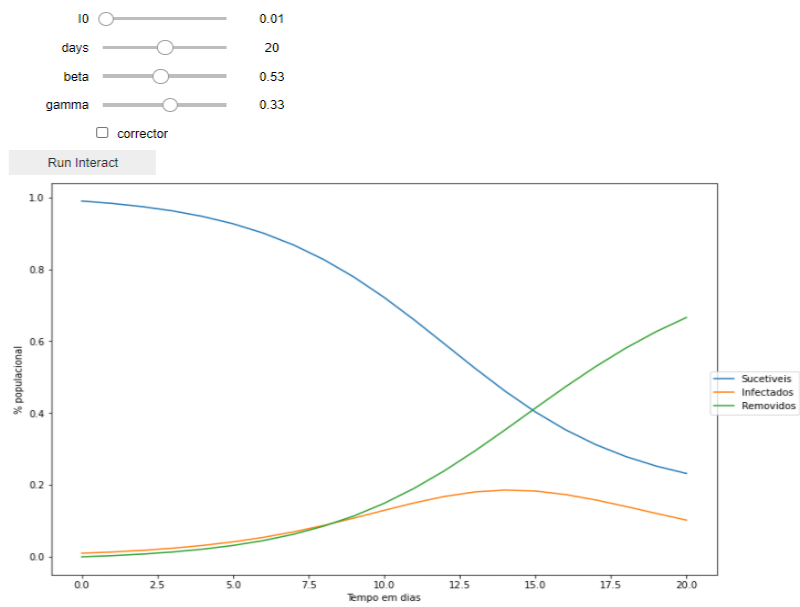

###**Analise do modelo SIR simulação de Medidas preventivas**

Ao dadotarmos medidas para diminuição da propagação da infecção(Beta em nossa ferramenta) como lockdown, distanciamento social e medidas preventivas, simulando o impacto dimuindo nossa variavel em 20% (Beta= 0,505956675).

O pico da curva e bem diminuido para em torno de 2,5%, levando a 0,25% da população a UTI, um numero dificil de se manejar porem mais proximo ao atendimento possivel.

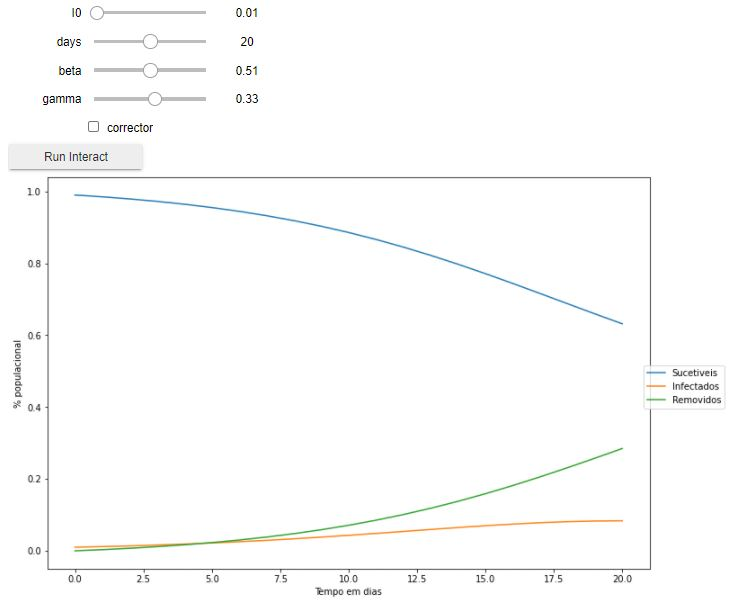

###**Analise do modelo SIR simulação de Tratamento eficaz**

Ao desenvolvermos metodos para melhora do paciente como tratamentos dedicados ao COVID-19 que sejam mais efetivos que os adotados inicialmente tambem podemos diminuir o pico de contagio.

Considerando uma eficacia de 30% maior no tempo de recuperação (Gamma em nossa ferramenta = 0,42300856), temos o pico da curva em torno dos 4%, levando a 0,4% da população da UTI, como analisado anteriormente ainda um cenario ruim. 

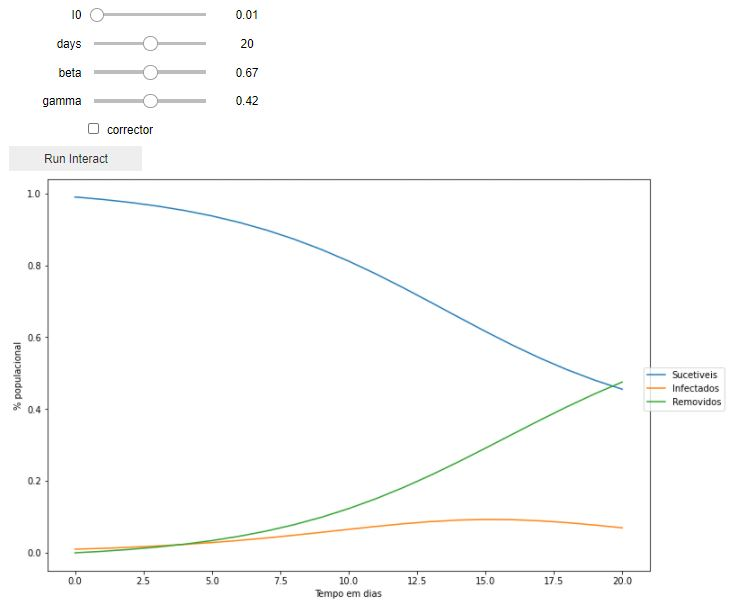

###**Analise do modelo SIR simulação de Tratamento junto a medidas preventivas**

Ao adotar ambas as medidas, prevenção e tratamento especifico podemos observar no grafico que a infecção se torna controlada, não levando a uma curva significativa, assim havendo leitos para o tratamento da população.

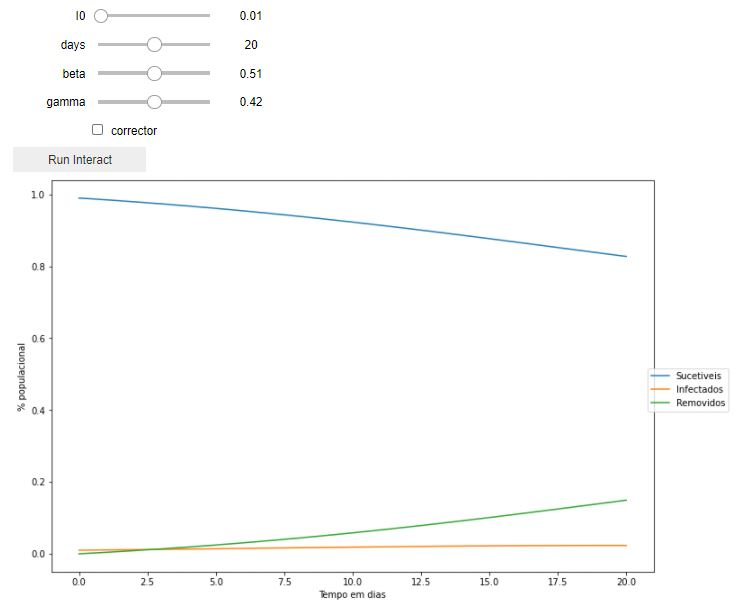


##**Conclusão do estudo do modelo SIR**

Podemos observar como uma pandemia que nao seja bem controlada se torna desastroza em pouco tempo atingindo uma abrangencia assustadora e para que seja controlada devem ser tomadas medidas sociais de prevenção (distanciamento social, habitos de higiene e etc...) assim como medidas medicas eficazes (medicação comprovadamente eficaz, grande volume de leitos para atendimento, acesso a saude publica e etc...)

Por se tratar de um modelo amador e de analise geral, não foram consideradas especificidades como acesso a hospitais e remedios, casos de reinfecção, densidade populacional e etc... Se trata apenas de um modelo para uma visão geral, uma introdução ao assunto pelo ponto de vista de um admirador porem não especialista.


#**Conclusão**

Ao analisar os dados focando na quantidade de infecções causadas pelo COVID-19, podemos entender a velocidade e a abrangencia de uma doença altamente contagiosa, atngindo todas as regiões de nosso pais (e do mundo), com crescimento rapido no numero de infecções, as diferenças nos tratamentos e nas medidas adotadas nos estados refletem que não somente a população local e um fator importante pois podemos observar que mesmo em estados com as maiores populações a fração da população completa de cada estado infectado e diferenta, assim como a fração de obitos tambem, logo mais variaveis devem ser analisadas para uma maior precisão do ocorrido, porem com o estudo presente podemos entender a magnetude e a complexidade dessa pandemia.


Este estudo foi realizado em Novembro de 2020 no Brasil, estamos ''no olho do furacão'' no que parece ser o inicio da segunda onda, enfrentamos esta dificuldade como jamais vista por nossa geração, porem com informação correta e consciencia podemos minimizar os possiveis danos causados, por isso deixo meus sinceros agradecimentos a todos que lutam para salvar vidas todos os dias, seja com tratamentos, pesquisa, disceminar as informações corretas e tambem aos que fazem o maximo ao seu alcance sem negligenciar esta doença.

Em especial agradeço a Guilherme Silveira, Thiago Santos e equipe da Alura(https://www.alura.com.br/) pelas aulas e pelo desafio proposto, a Kizzy Terra e Hallison Paz do canal Programação Dinamica(https://www.youtube.com/channel/UC70mr11REaCqgKke7DPJoLg) por todo conteudo disponibilizado e pela ajuda com o fornecimento do modelo SIR e ao Meigarom do canal Seja Um Data Scientist(https://www.youtube.com/channel/UCar5Cr-pVz08GY_6I3RX9bA) pelo conteudo e pela orientação em como encontrar insights.

Paulo Amaral.

www.linkedin.com/in/paulodshamaral